# Make Database for PanAnt Experiments

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)

In [3]:
dir_list = ['/g/data/x77/amh157/PanAnt/archive/panant-v2','/g/data/x77/amh157/PanAnt/archive/panant-hycom1']
cc.database.build_index(dir_list,session)

Indexing experiment: panant-v2


100%|██████████| 135/135 [00:42<00:00,  3.17it/s]


Indexing experiment: panant-hycom1


100%|██████████| 135/135 [00:43<00:00,  3.09it/s]


270

## Widget to check variable names

In [7]:
dbx = cc.explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

## Looking at KE, for spinup

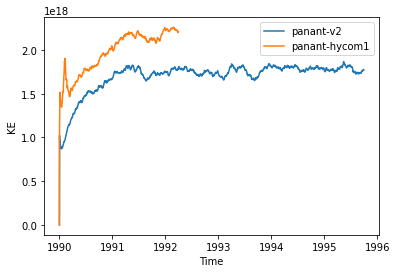

In [4]:
expts = ['panant-v2','panant-hycom1']
for expt in expts:
    darray = cc.querying.getvar(expt,'KE', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.sum('Layer').plot(label=expt)
plt.legend()

## Checking CFL

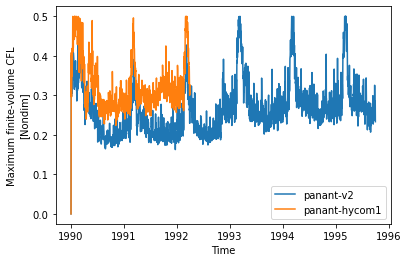

In [5]:
for expt in expts:
    darray = cc.querying.getvar(expt,'max_CFL_trans', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.plot(label=expt)
plt.legend()

# Checking Truncations

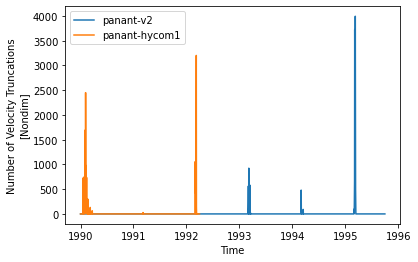

In [6]:
for expt in expts:
    darray = cc.querying.getvar(expt,'Ntrunc', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.plot(label=expt)
plt.legend()